# Assignment: Compresive Strength Concrete Problem


### Abstract: 

Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.  <br><br>

<table border="1"  cellpadding="6" bordercolor="red">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">1030</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">9</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">2007-08-03</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">231464</p></td>
	</tr>
    </tbody>
    </table>

###  Description:
| Features Name | Data Type | Measurement | Description |
| -- | -- | -- | -- |
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable
Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable
Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable
Water (component 4) | quantitative | kg in a m3 mixture | Input Variable
Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable
Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable
Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable
Age | quantitative | Day (1~365) | Input Variable
Concrete compressive strength | quantitative | MPa | Output Variable

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature )
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
- Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
- Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
- Train the Model with Epochs (100) and validate it
- If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv)

In [104]:
import pandas as pd
import numpy as np

In [105]:
#from google.colab import drive
#drive.mount('/content/drive')

In [106]:
file=pd.read_csv('CarPrice_Assignment.csv' , na_values="?")
file

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [107]:
#file.dtypes

In [108]:
obj_df = file.select_dtypes(include=['object']) ###.copy()
obj_df.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [109]:
obj_df[obj_df.isnull().any(axis=1)]

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem


In [110]:
#obj_df["doornumber"].value_counts()

In [111]:
#obj_df["cylindernumber"].value_counts()

In [112]:
cleanup_nums = {"doornumber":     {"four": 4, "two": 2},
                "cylindernumber": {"four": 4, "six": 6, "five": 5, "eight": 8,
                                  "two": 2, "twelve": 12, "three":3 }}

In [113]:
obj_df = obj_df.replace(cleanup_nums)
obj_df.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,2,convertible,rwd,front,dohc,4,mpfi
1,alfa-romero stelvio,gas,std,2,convertible,rwd,front,dohc,4,mpfi
2,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,ohcv,6,mpfi
3,audi 100 ls,gas,std,4,sedan,fwd,front,ohc,4,mpfi
4,audi 100ls,gas,std,4,sedan,4wd,front,ohc,5,mpfi


In [114]:
obj_df["OHC_Code"] = np.where(obj_df["enginetype"].str.contains("ohc"), 1, 0)
obj_df["Carname"] = np.where(obj_df["CarName"].str.contains("audi"), 1, 0)

In [115]:

#obj_df[["CarName", "enginetype", "OHC_Code"]]

In [116]:
cod_obj=pd.get_dummies(obj_df, columns=["carbody", "drivewheel","enginelocation","aspiration","fueltype","fuelsystem"], prefix=["body", "drive","loc", "aspir","fuel","mfi"])
cod_obj

,CarName,doornumber,enginetype,cylindernumber,OHC_Code,Carname,body_convertible,body_hardtop,body_hatchback,body_sedan,...,fuel_diesel,fuel_gas,mfi_1bbl,mfi_2bbl,mfi_4bbl,mfi_idi,mfi_mfi,mfi_mpfi,mfi_spdi,mfi_spfi
0,alfa-romero giulia,2,dohc,4,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,alfa-romero stelvio,2,dohc,4,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,alfa-romero Quadrifoglio,2,ohcv,6,1,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
3,audi 100 ls,4,ohc,4,1,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,audi 100ls,4,ohc,5,1,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),4,ohc,4,1,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
201,volvo 144ea,4,ohc,4,1,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
202,volvo 244dl,4,ohcv,6,1,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
203,volvo 246,4,ohc,6,1,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0


In [117]:
obj_df

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,OHC_Code,Carname
0,alfa-romero giulia,gas,std,2,convertible,rwd,front,dohc,4,mpfi,1,0
1,alfa-romero stelvio,gas,std,2,convertible,rwd,front,dohc,4,mpfi,1,0
2,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,ohcv,6,mpfi,1,0
3,audi 100 ls,gas,std,4,sedan,fwd,front,ohc,4,mpfi,1,1
4,audi 100ls,gas,std,4,sedan,4wd,front,ohc,5,mpfi,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,4,sedan,rwd,front,ohc,4,mpfi,1,0
201,volvo 144ea,gas,turbo,4,sedan,rwd,front,ohc,4,mpfi,1,0
202,volvo 244dl,gas,std,4,sedan,rwd,front,ohcv,6,mpfi,1,0
203,volvo 246,diesel,turbo,4,sedan,rwd,front,ohc,6,idi,1,0


In [118]:

#pd.get_dummies(obj_df, columns=['carbody', 'drivewheel'] ,prefix=['body','wheel']).head()

In [119]:
cod_obj

,CarName,doornumber,enginetype,cylindernumber,OHC_Code,Carname,body_convertible,body_hardtop,body_hatchback,body_sedan,...,fuel_diesel,fuel_gas,mfi_1bbl,mfi_2bbl,mfi_4bbl,mfi_idi,mfi_mfi,mfi_mpfi,mfi_spdi,mfi_spfi
0,alfa-romero giulia,2,dohc,4,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,alfa-romero stelvio,2,dohc,4,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,alfa-romero Quadrifoglio,2,ohcv,6,1,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
3,audi 100 ls,4,ohc,4,1,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,audi 100ls,4,ohc,5,1,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),4,ohc,4,1,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
201,volvo 144ea,4,ohc,4,1,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
202,volvo 244dl,4,ohcv,6,1,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
203,volvo 246,4,ohc,6,1,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0


In [120]:
cod_obj.columns
del cod_obj['CarName']
del cod_obj['enginetype']

In [121]:
cod_obj

,doornumber,cylindernumber,OHC_Code,Carname,body_convertible,body_hardtop,body_hatchback,body_sedan,body_wagon,drive_4wd,...,fuel_diesel,fuel_gas,mfi_1bbl,mfi_2bbl,mfi_4bbl,mfi_idi,mfi_mfi,mfi_mpfi,mfi_spdi,mfi_spfi
0,2,4,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,2,4,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,2,6,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,4,4,1,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
4,4,5,1,1,0,0,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,4,4,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
201,4,4,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
202,4,6,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
203,4,6,1,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0


In [122]:
dataaa = file.select_dtypes(include=['int64'])
dataf= file.select_dtypes(include=['float64'])
dataaa

,car_ID,symboling,curbweight,enginesize,horsepower,peakrpm,citympg,highwaympg
0,1,3,2548,130,111,5000,21,27
1,2,3,2548,130,111,5000,21,27
2,3,1,2823,152,154,5000,19,26
3,4,2,2337,109,102,5500,24,30
4,5,2,2824,136,115,5500,18,22
...,...,...,...,...,...,...,...,...
200,201,-1,2952,141,114,5400,23,28
201,202,-1,3049,141,160,5300,19,25
202,203,-1,3012,173,134,5500,18,23
203,204,-1,3217,145,106,4800,26,27


In [133]:
df_col_merged = pd.concat([dataaa, dataf], axis=1)
df_col_merged 

,car_ID,symboling,curbweight,enginesize,horsepower,peakrpm,citympg,highwaympg,wheelbase,carlength,carwidth,carheight,boreratio,stroke,compressionratio,price
0,1,3,2548,130,111,5000,21,27,88.6,168.8,64.1,48.8,3.47,2.68,9.0,13495.0
1,2,3,2548,130,111,5000,21,27,88.6,168.8,64.1,48.8,3.47,2.68,9.0,16500.0
2,3,1,2823,152,154,5000,19,26,94.5,171.2,65.5,52.4,2.68,3.47,9.0,16500.0
3,4,2,2337,109,102,5500,24,30,99.8,176.6,66.2,54.3,3.19,3.40,10.0,13950.0
4,5,2,2824,136,115,5500,18,22,99.4,176.6,66.4,54.3,3.19,3.40,8.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,2952,141,114,5400,23,28,109.1,188.8,68.9,55.5,3.78,3.15,9.5,16845.0
201,202,-1,3049,141,160,5300,19,25,109.1,188.8,68.8,55.5,3.78,3.15,8.7,19045.0
202,203,-1,3012,173,134,5500,18,23,109.1,188.8,68.9,55.5,3.58,2.87,8.8,21485.0
203,204,-1,3217,145,106,4800,26,27,109.1,188.8,68.9,55.5,3.01,3.40,23.0,22470.0


In [134]:
dataf

,wheelbase,carlength,carwidth,carheight,boreratio,stroke,compressionratio,price
0,88.6,168.8,64.1,48.8,3.47,2.68,9.0,13495.0
1,88.6,168.8,64.1,48.8,3.47,2.68,9.0,16500.0
2,94.5,171.2,65.5,52.4,2.68,3.47,9.0,16500.0
3,99.8,176.6,66.2,54.3,3.19,3.40,10.0,13950.0
4,99.4,176.6,66.4,54.3,3.19,3.40,8.0,17450.0
...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,3.78,3.15,9.5,16845.0
201,109.1,188.8,68.8,55.5,3.78,3.15,8.7,19045.0
202,109.1,188.8,68.9,55.5,3.58,2.87,8.8,21485.0
203,109.1,188.8,68.9,55.5,3.01,3.40,23.0,22470.0


In [135]:
df_col_merged

,car_ID,symboling,curbweight,enginesize,horsepower,peakrpm,citympg,highwaympg,wheelbase,carlength,carwidth,carheight,boreratio,stroke,compressionratio,price
0,1,3,2548,130,111,5000,21,27,88.6,168.8,64.1,48.8,3.47,2.68,9.0,13495.0
1,2,3,2548,130,111,5000,21,27,88.6,168.8,64.1,48.8,3.47,2.68,9.0,16500.0
2,3,1,2823,152,154,5000,19,26,94.5,171.2,65.5,52.4,2.68,3.47,9.0,16500.0
3,4,2,2337,109,102,5500,24,30,99.8,176.6,66.2,54.3,3.19,3.40,10.0,13950.0
4,5,2,2824,136,115,5500,18,22,99.4,176.6,66.4,54.3,3.19,3.40,8.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,2952,141,114,5400,23,28,109.1,188.8,68.9,55.5,3.78,3.15,9.5,16845.0
201,202,-1,3049,141,160,5300,19,25,109.1,188.8,68.8,55.5,3.78,3.15,8.7,19045.0
202,203,-1,3012,173,134,5500,18,23,109.1,188.8,68.9,55.5,3.58,2.87,8.8,21485.0
203,204,-1,3217,145,106,4800,26,27,109.1,188.8,68.9,55.5,3.01,3.40,23.0,22470.0


In [136]:
cod_obj

,doornumber,cylindernumber,OHC_Code,Carname,body_convertible,body_hardtop,body_hatchback,body_sedan,body_wagon,drive_4wd,...,fuel_diesel,fuel_gas,mfi_1bbl,mfi_2bbl,mfi_4bbl,mfi_idi,mfi_mfi,mfi_mpfi,mfi_spdi,mfi_spfi
0,2,4,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,2,4,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,2,6,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,4,4,1,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
4,4,5,1,1,0,0,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,4,4,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
201,4,4,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
202,4,6,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
203,4,6,1,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0


In [137]:
final=pd.concat([df_col_merged, cod_obj],axis=1)
final

,car_ID,symboling,curbweight,enginesize,horsepower,peakrpm,citympg,highwaympg,wheelbase,carlength,...,fuel_diesel,fuel_gas,mfi_1bbl,mfi_2bbl,mfi_4bbl,mfi_idi,mfi_mfi,mfi_mpfi,mfi_spdi,mfi_spfi
0,1,3,2548,130,111,5000,21,27,88.6,168.8,...,0,1,0,0,0,0,0,1,0,0
1,2,3,2548,130,111,5000,21,27,88.6,168.8,...,0,1,0,0,0,0,0,1,0,0
2,3,1,2823,152,154,5000,19,26,94.5,171.2,...,0,1,0,0,0,0,0,1,0,0
3,4,2,2337,109,102,5500,24,30,99.8,176.6,...,0,1,0,0,0,0,0,1,0,0
4,5,2,2824,136,115,5500,18,22,99.4,176.6,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,2952,141,114,5400,23,28,109.1,188.8,...,0,1,0,0,0,0,0,1,0,0
201,202,-1,3049,141,160,5300,19,25,109.1,188.8,...,0,1,0,0,0,0,0,1,0,0
202,203,-1,3012,173,134,5500,18,23,109.1,188.8,...,0,1,0,0,0,0,0,1,0,0
203,204,-1,3217,145,106,4800,26,27,109.1,188.8,...,1,0,0,0,0,1,0,0,0,0


In [138]:
label=final['price'].copy()
label

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [139]:
del final['price']


In [140]:
final

,car_ID,symboling,curbweight,enginesize,horsepower,peakrpm,citympg,highwaympg,wheelbase,carlength,...,fuel_diesel,fuel_gas,mfi_1bbl,mfi_2bbl,mfi_4bbl,mfi_idi,mfi_mfi,mfi_mpfi,mfi_spdi,mfi_spfi
0,1,3,2548,130,111,5000,21,27,88.6,168.8,...,0,1,0,0,0,0,0,1,0,0
1,2,3,2548,130,111,5000,21,27,88.6,168.8,...,0,1,0,0,0,0,0,1,0,0
2,3,1,2823,152,154,5000,19,26,94.5,171.2,...,0,1,0,0,0,0,0,1,0,0
3,4,2,2337,109,102,5500,24,30,99.8,176.6,...,0,1,0,0,0,0,0,1,0,0
4,5,2,2824,136,115,5500,18,22,99.4,176.6,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,2952,141,114,5400,23,28,109.1,188.8,...,0,1,0,0,0,0,0,1,0,0
201,202,-1,3049,141,160,5300,19,25,109.1,188.8,...,0,1,0,0,0,0,0,1,0,0
202,203,-1,3012,173,134,5500,18,23,109.1,188.8,...,0,1,0,0,0,0,0,1,0,0
203,204,-1,3217,145,106,4800,26,27,109.1,188.8,...,1,0,0,0,0,1,0,0,0,0


In [141]:
label

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [142]:
final[final.isnull().any(axis=1)]

,car_ID,symboling,curbweight,enginesize,horsepower,peakrpm,citympg,highwaympg,wheelbase,carlength,...,fuel_diesel,fuel_gas,mfi_1bbl,mfi_2bbl,mfi_4bbl,mfi_idi,mfi_mfi,mfi_mpfi,mfi_spdi,mfi_spfi


In [144]:
final=np.array(final)
label=np.array(label)

In [147]:
train_data=final[:150]
train_targets=label[:150]

test_data=final[150:]
test_targets=label[150:]

test_targets.shape


(150, 41)

In [148]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [149]:
from tensorflow.keras import models
from tensorflow.keras import layers

C:\Users\Usama\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Usama\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Usama\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Usama\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [196]:

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(10, activation='relu',
    input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(8, activation='relu'))
    model.add(layers.Dense(6, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [199]:

k=3
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples],
    train_data[(i + 1) * num_val_samples:]],
    axis=0)
    partial_train_targets = np.concatenate(
    [train_targets[:i * num_val_samples],
    train_targets[(i + 1) * num_val_samples:]],
    axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
    epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2


In [200]:
all_scores

[5399.5796, 4221.352, 5369.0454]

In [166]:
num_epochs = 20
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples],
    train_data[(i + 1) * num_val_samples:]],
    axis=0)
    partial_train_targets = np.concatenate(
    [train_targets[:i * num_val_samples],
    train_targets[(i + 1) * num_val_samples:]],
    axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
    validation_data=(val_data, val_targets),
    epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [167]:
average_mae_history = [
np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

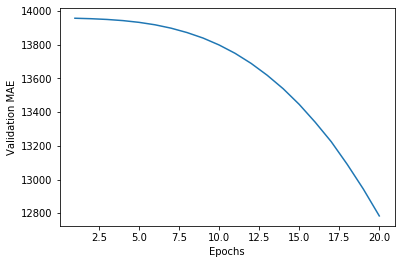

In [168]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

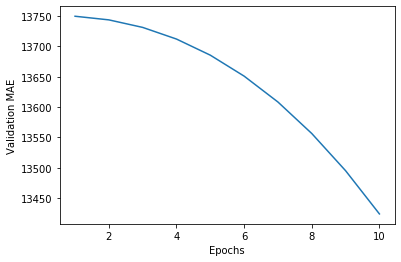

In [169]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [170]:
model = build_model()
model.fit(train_data, train_targets,
epochs=60, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

55/55 [==============================] - 0s 4ms/sample - loss: 149059259.6364 - mean_absolute_error: 11430.2549


In [171]:
 test_mae_score

11430.255